### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('coupons.csv')

In [3]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
print(data.isnull().any())
print(data.isnull().sum())

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
car                      True
Bar                      True
CoffeeHouse              True
CarryAway                True
RestaurantLessThan20     True
Restaurant20To50         True
toCoupon_GEQ5min        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  

In [5]:
print(data.isnull())

       destination  passanger  weather  temperature   time  coupon  \
0            False      False    False        False  False   False   
1            False      False    False        False  False   False   
2            False      False    False        False  False   False   
3            False      False    False        False  False   False   
4            False      False    False        False  False   False   
...            ...        ...      ...          ...    ...     ...   
12679        False      False    False        False  False   False   
12680        False      False    False        False  False   False   
12681        False      False    False        False  False   False   
12682        False      False    False        False  False   False   
12683        False      False    False        False  False   False   

       expiration  gender    age  maritalStatus  ...  CoffeeHouse  CarryAway  \
0           False   False  False          False  ...        False       True   

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
data = data.fillna(0)
print(data.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon? 



In [7]:
DF_Count =len(data[data["Y"]==0])
DF_Count

5474

5. Use a bar plot to visualize the `coupon` column.

In [41]:
#data.plot(X="Copuon",Y= "y",kind="bar")
#sns.barplot(Data = data,X="coupon")
df = data.plot.bar(x='coupon',y='Y')

Error in callback <function flush_figures at 0x000002B1FCC6ED40> (for post_execute):



KeyboardInterrupt



6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Histogram of Temperature')

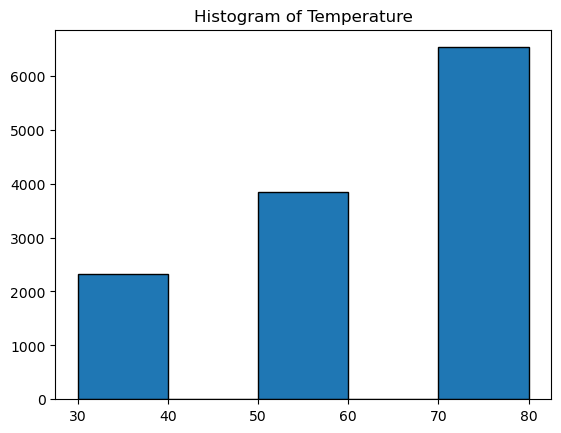

In [8]:
plt.hist(data['temperature'],edgecolor='Black',bins=5)
plt.title('Histogram of Temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [63]:
DataCoupon = data.query('coupon== "Bar"')
DataCoupon.sample(150)
#DataCoupon.info()
DataCoupon['Bar'].unique()
#DataCoupon_Copy.query('Bar== "Zero"')
DataCoupon_Copy = DataCoupon.copy()
DataCoupon_Copy['Bar'].unique()
#DataCoupon_Copy['Bar'].replace('never',0, inplace =True)
DataCoupon_Copy = DataCoupon_Copy.replace('less1',1)
DataCoupon_Copy = DataCoupon_Copy.replace('never',0)
DataCoupon_Copy = DataCoupon_Copy.replace('gt8',8)
DataCoupon_Copy = DataCoupon_Copy.replace('4~8',5)
DataCoupon_Copy = DataCoupon_Copy.replace('1~3',3)
DataCoupon_Copy['Bar'].unique()
len(DataCoupon)
#DataCoupon_Copy.query('Bar== "Zero"')

2017

2. What proportion of bar coupons were accepted?


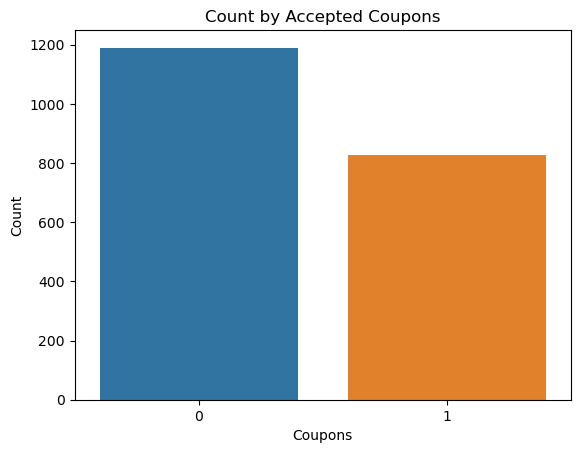

In [17]:
len(DataCoupon.query('Y == 1'))
fig = sns.countplot(x="Y", data=DataCoupon)
plt.xlabel("Coupons")
plt.ylabel("Count")
plt.title("Count by Accepted Coupons")
plt.show(fig)


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


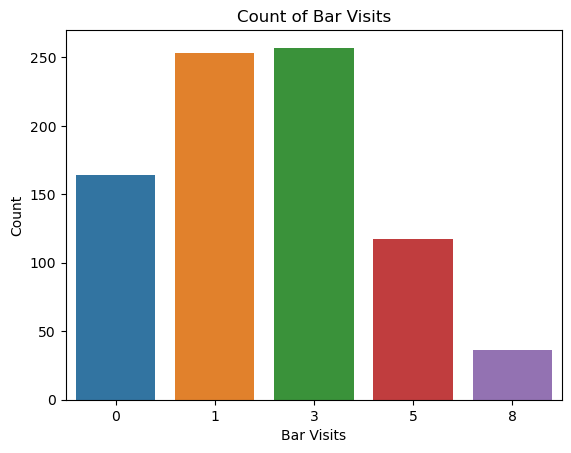

In [59]:

AcceptedBar= DataCoupon_Copy.query('Y==1')


AcceptedBar.sample(100)
len(AcceptedBar) #827
#ans5 = AcceptedBar.query('Bar ==[5,3,8]') #410

#len(ans5) #410

#ans5 = AcceptedBar.query('Bar !=[5,3,8]')  #417

#len(ans5) 

#AcceptedBar['Bar'].unique()



#len(DataCoupon.query('Y == 1'))
fig = sns.countplot(x="Bar", data=AcceptedBar)
plt.xlabel("Bar Visits")
plt.ylabel("Count")
plt.title("Count of Bar Visits")
plt.show(fig)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [61]:
DataCoupon_Copy['age'].unique()
DataCoupon_Copy['Bar'].unique()
len(DataCoupon_Copy)
#DataCoupon_Bar = DataCoupon_Copy.query('Bar ==[1,5,3,8]')
#len(DataCoupon_Bar)

2017

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  